In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use("CMS")
hep.style.use(hep.style.CMS)

In [10]:
data_directory = "../"
file_name = "reco_neutron_discrete_1GeV-150GeV_theta_1.273deg-5.7deg_000.edm4hep.root"
with ur.open("{file}:events".format(file=data_directory+file_name)) as events:
    MC = events.arrays(["MCParticles.generatorStatus", "MCParticles.PDG",'MCParticles.mass',
                            'MCParticles.momentum.x', 'MCParticles.momentum.y', 'MCParticles.momentum.z', 'MCParticles.endpoint.z', 
                            'MCParticles.vertex.x', 'MCParticles.vertex.y', 'MCParticles.vertex.z'])
    reco = events.arrays(["EcalEndcapPRecHits.energy", "EcalEndcapPRecHits.time", "EcalEndcapPRecHits.position.x", "EcalEndcapPRecHits.position.y", "EcalEndcapPRecHits.position.z",
                          "EcalEndcapPInsertRecHits.energy", "EcalEndcapPInsertRecHits.time", "EcalEndcapPInsertRecHits.position.x", "EcalEndcapPInsertRecHits.position.y", "EcalEndcapPInsertRecHits.position.z",
                          "HcalEndcapPInsertRecHits.energy", "HcalEndcapPInsertRecHits.time", "HcalEndcapPInsertRecHits.position.x", "HcalEndcapPInsertRecHits.position.y", "HcalEndcapPInsertRecHits.position.z",
                          "LFHCALRecHits.energy", "LFHCALRecHits.time", "LFHCALRecHits.position.x", "LFHCALRecHits.position.y", "LFHCALRecHits.position.z"])
    print("Number of events:",events.num_entries)

Number of events: 1000


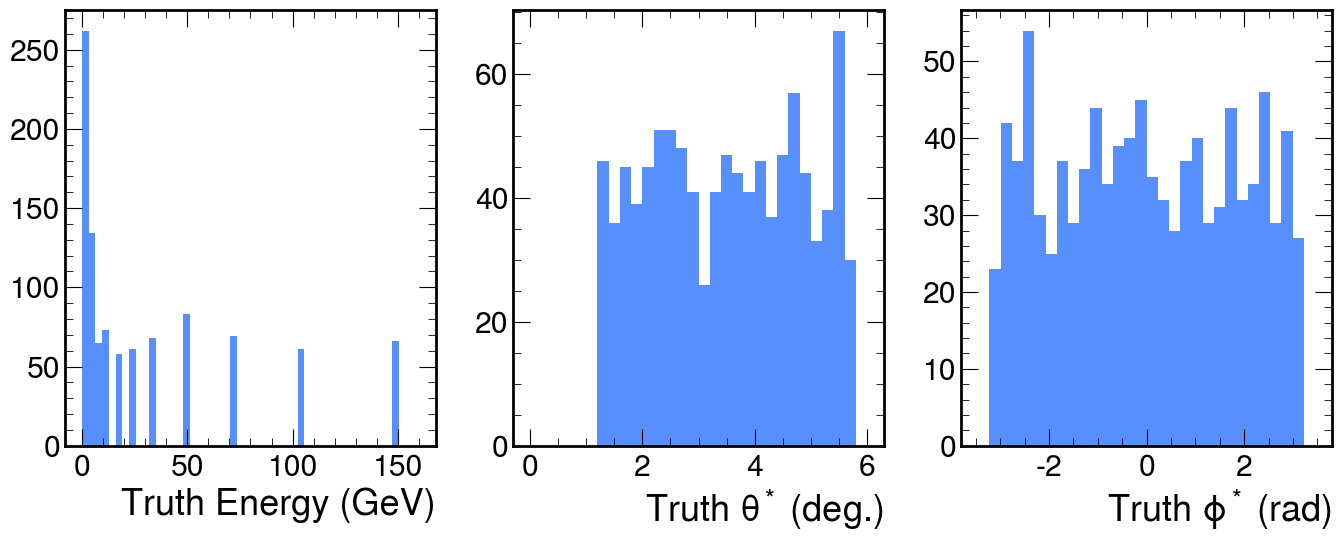

In [16]:
def rotateY(xdata, zdata, angle):
    s = np.sin(angle)
    c = np.cos(angle)
    rotatedz = c*zdata - s*xdata
    rotatedx = s*zdata + c*xdata
    return rotatedx, rotatedz

# Mask to get incident final state information
final_state_mask = (MC["MCParticles.generatorStatus"]==1)
# Getting the momentum in different directions and mass of the final states
px = MC["MCParticles.momentum.x"][final_state_mask]
py = MC["MCParticles.momentum.y"][final_state_mask]
pz = MC["MCParticles.momentum.z"][final_state_mask]
mass = MC["MCParticles.mass"][final_state_mask]

px, pz = rotateY(px, pz, .025)


# Calculating the neutron's energy and the angles it was fired at
momentum = np.sqrt(px**2 + py**2 + pz**2)
energy = np.sqrt(momentum**2 + mass**2) # Units = GeV
theta = np.arccos(pz/momentum) # Units = radians
phi = np.arctan2(py, px) # Units = radians

# Plotting the neutron energy & angles
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(14,6))

ax1.hist(ak.flatten(momentum), bins = 50, range = [0, 160], histtype='stepfilled')
ax1.set_xlabel("Truth Energy (GeV)")
ax2.hist(ak.flatten(theta)*180/np.pi, bins = 30, range=[0, 6], histtype='stepfilled')
ax2.set_xlabel("Truth $\\theta^*$ (deg.)")

ax3.hist(ak.flatten(phi), bins = 30, range=[-1.1*np.pi, 1.1*np.pi], histtype='stepfilled')
ax3.set_xlabel("Truth $\phi^*$ (rad)")

plt.tight_layout()

Text(0.5, 1.0, 'Insert')

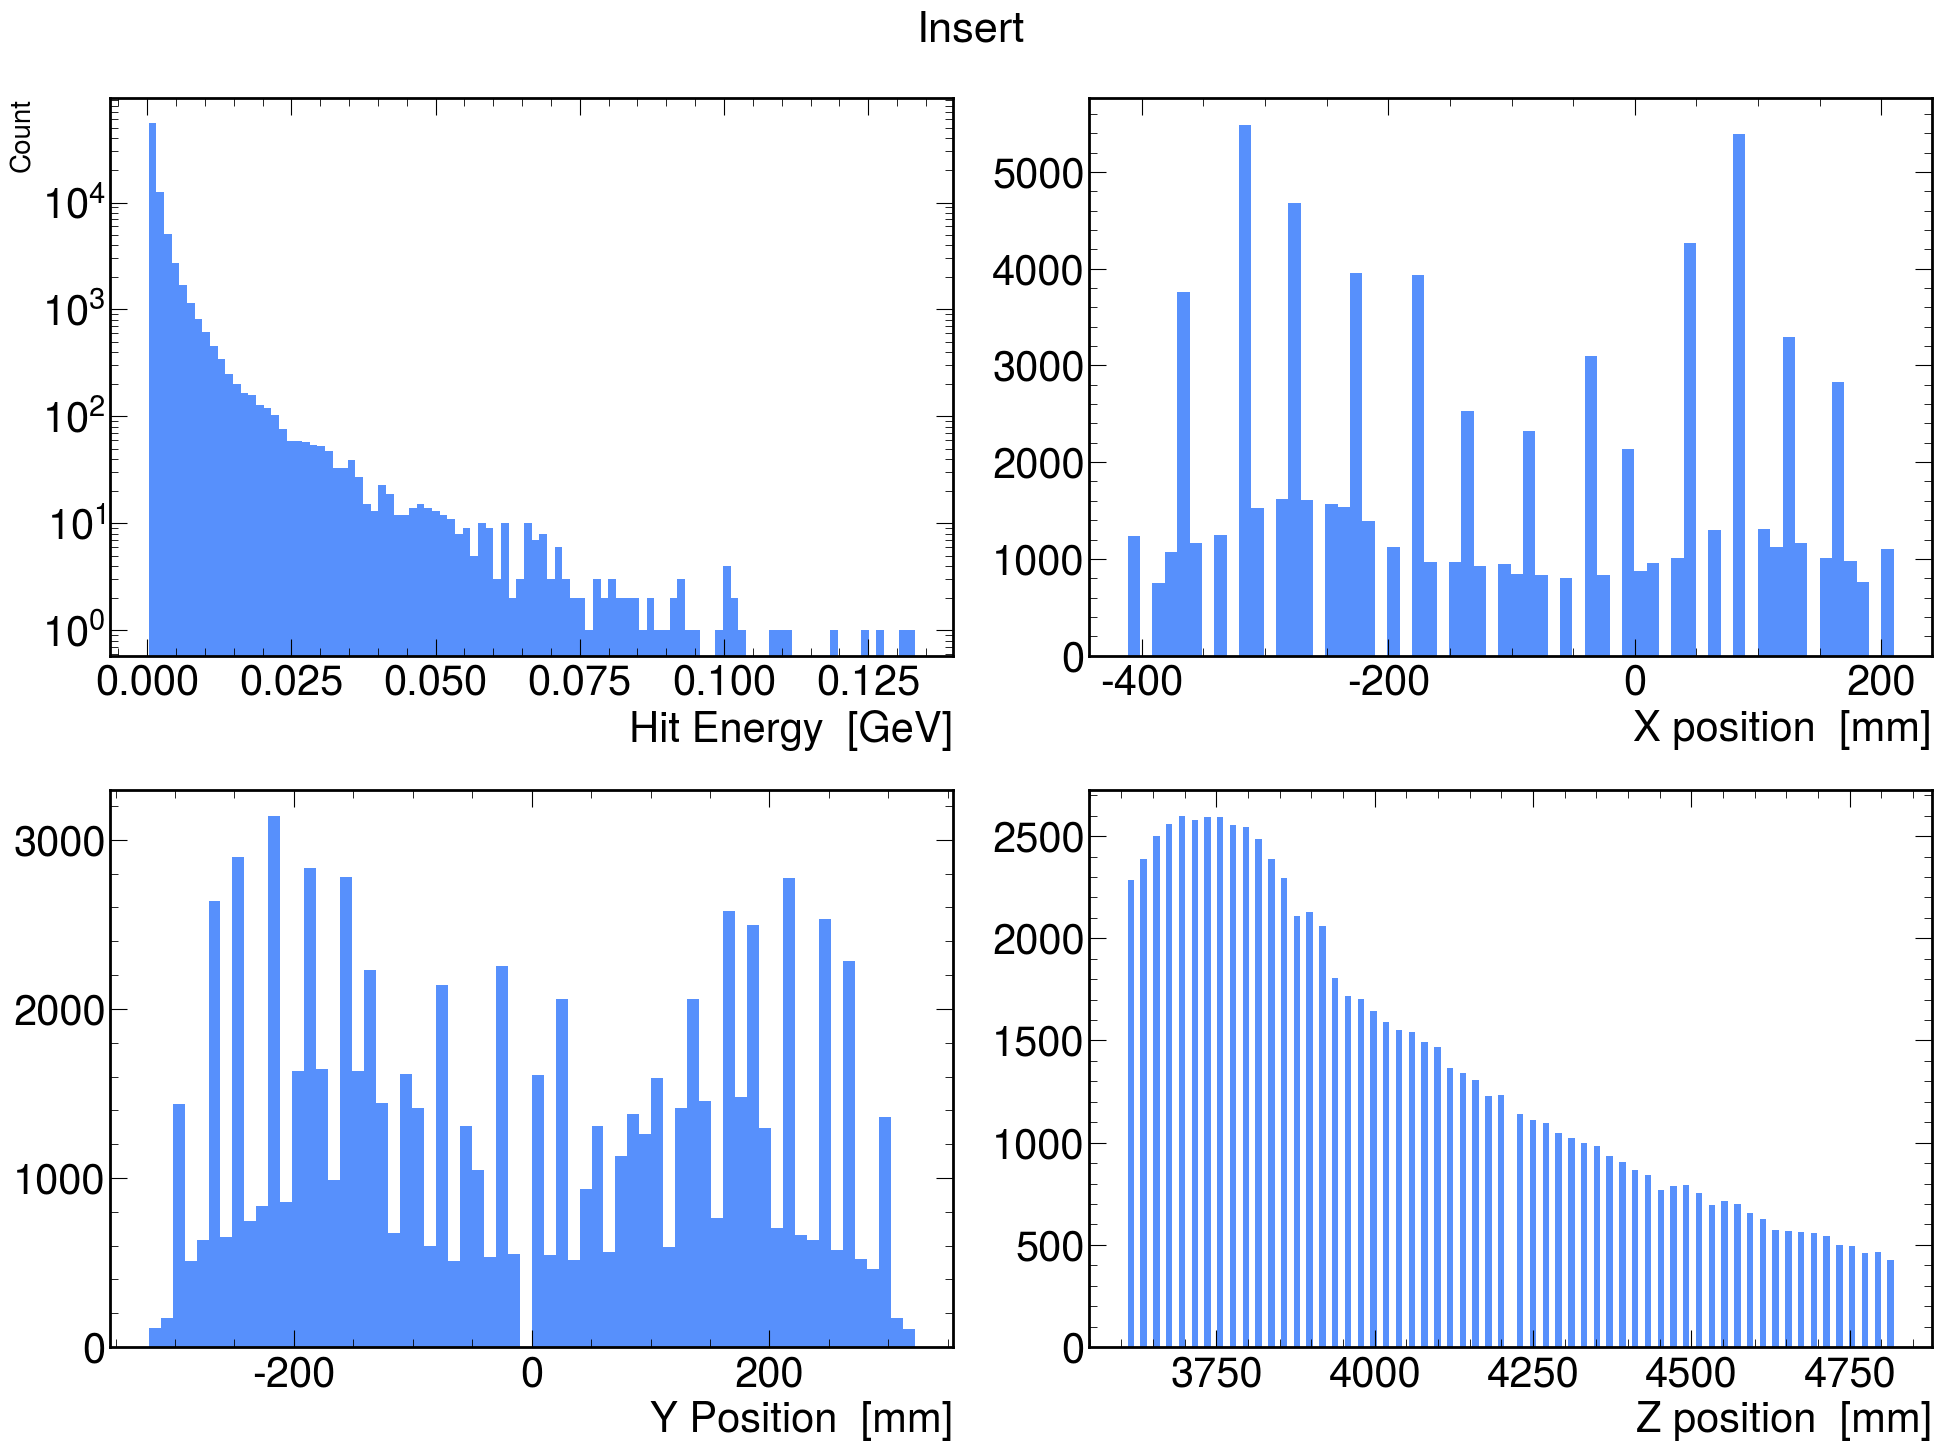

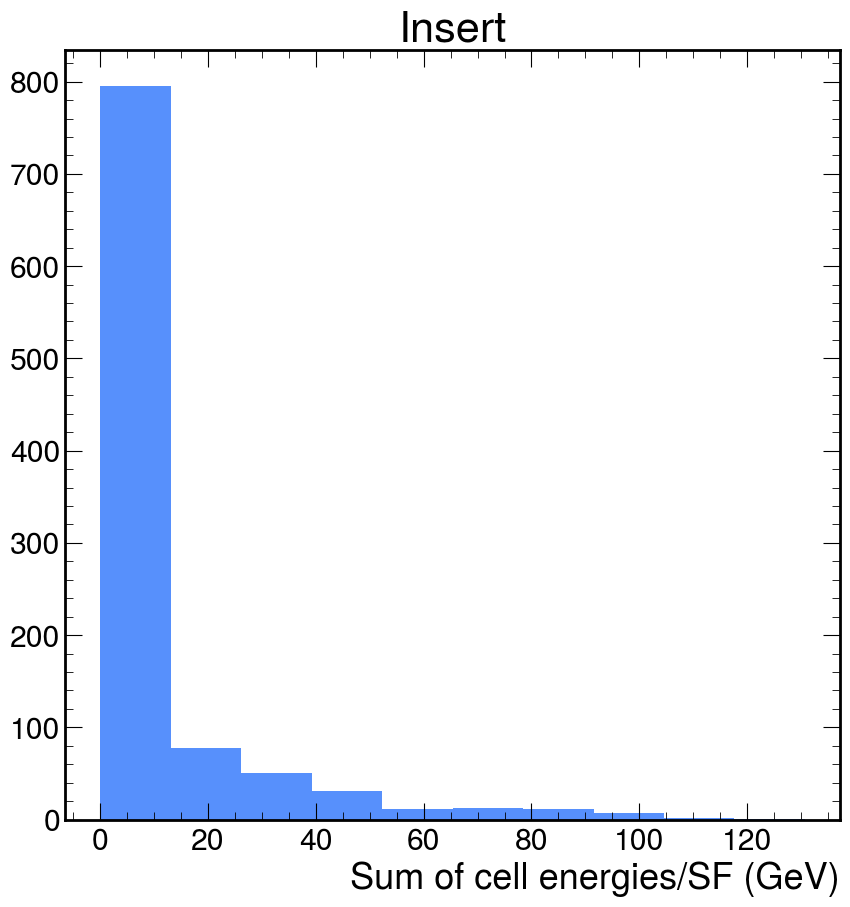

In [4]:
nrows=2
ncols=2
insert_cell_energies = reco["HcalEndcapPInsertRecHits.energy"]
insert_cell_times = reco["HcalEndcapPInsertRecHits.time"]
insert_x_pos = reco["HcalEndcapPInsertRecHits.position.x"]
insert_y_pos = reco["HcalEndcapPInsertRecHits.position.y"]
insert_z_pos = reco["HcalEndcapPInsertRecHits.position.z"]

fig2, ax2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
variables=[insert_cell_energies, insert_x_pos, insert_y_pos, insert_z_pos]
titles=['Hit Energy','X position', 'Y Position', 'Z position']
for index, (variable, title) in enumerate(zip(variables, titles)):
    irow=int(index/nrows)
    icol=index%ncols
    min_range=np.min(ak.flatten(variable))
    max_range=np.max(ak.flatten(variable))
    
    if index==0:
        ax2[irow, icol].set_ylabel("Count", fontsize=20)
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [GeV]", fontsize=30)
        ax2[irow, icol].set_yscale('log')
        nbins=100
    else:    
        nbins=int((max_range-min_range)/10.0) 
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [mm]", fontsize=30)
        
    ax2[irow, icol].hist(ak.flatten(variable), bins=nbins, histtype='stepfilled', linewidth=3)
    
    ax2[irow, icol].yaxis.set_tick_params(labelsize=30)
    ax2[irow, icol].xaxis.set_tick_params(labelsize=30)
plt.subplots_adjust(wspace=0.3, hspace=0.2)    
plt.suptitle("Insert")
plt.tight_layout()
# pdf_pages.savefig(fig2,   bbox_inches='tight')
fig = plt.figure()
plt.hist(ak.sum(insert_cell_energies, axis=1)/.02)
plt.xlabel("Sum of cell energies/SF (GeV)")
plt.title("Insert")

[[], [], ..., [3.51e+03, 3.51e+03, 3.51e+03, ..., 3.51e+03, 3.51e+03, 3.51e+03]]


Text(0.5, 1.0, 'ECal Insert')

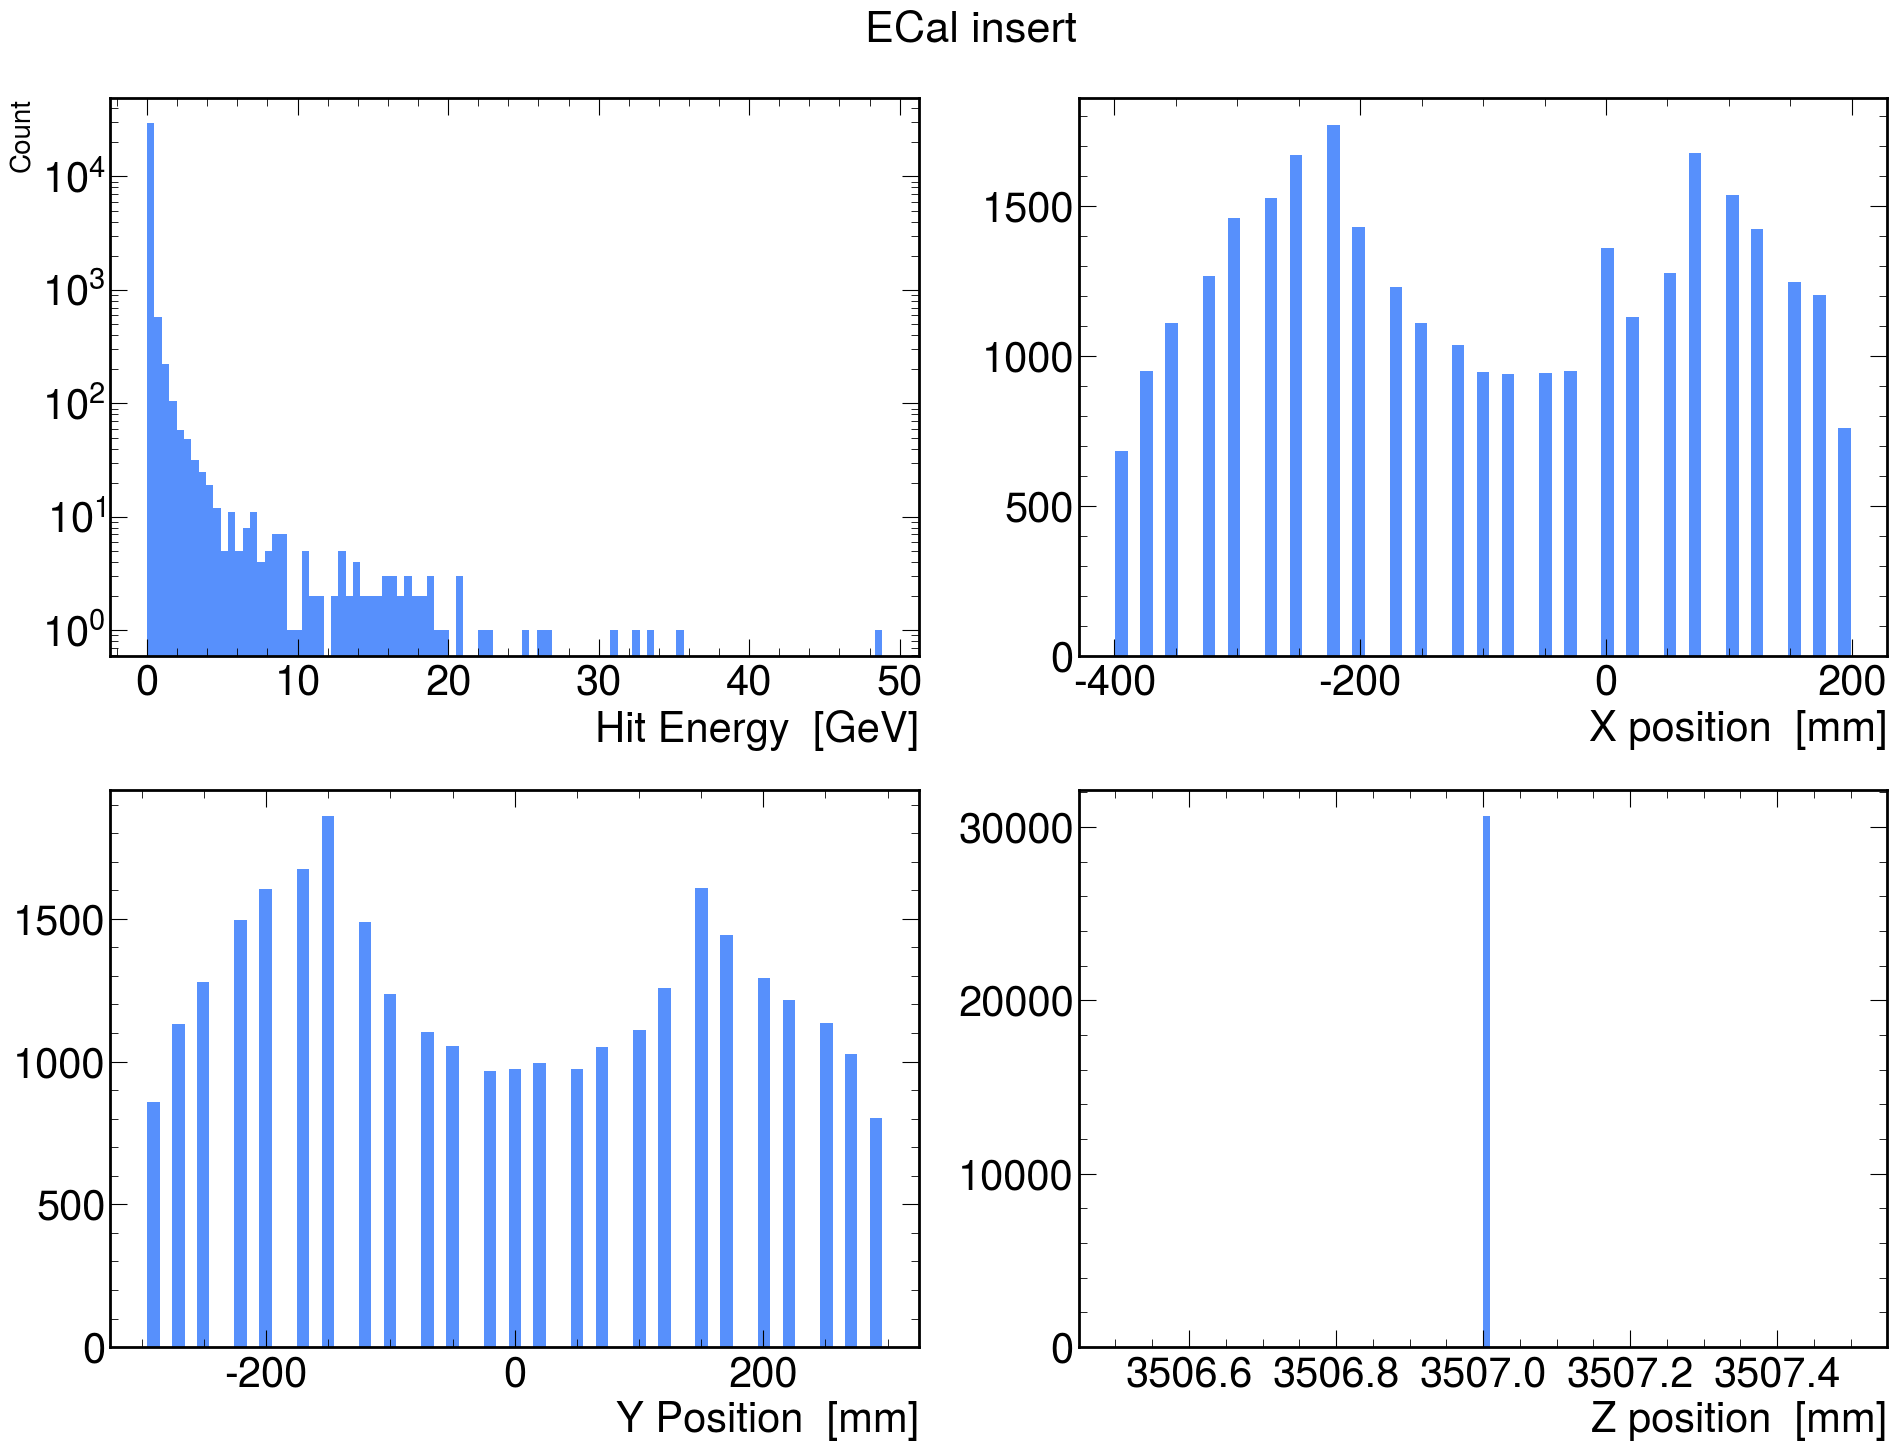

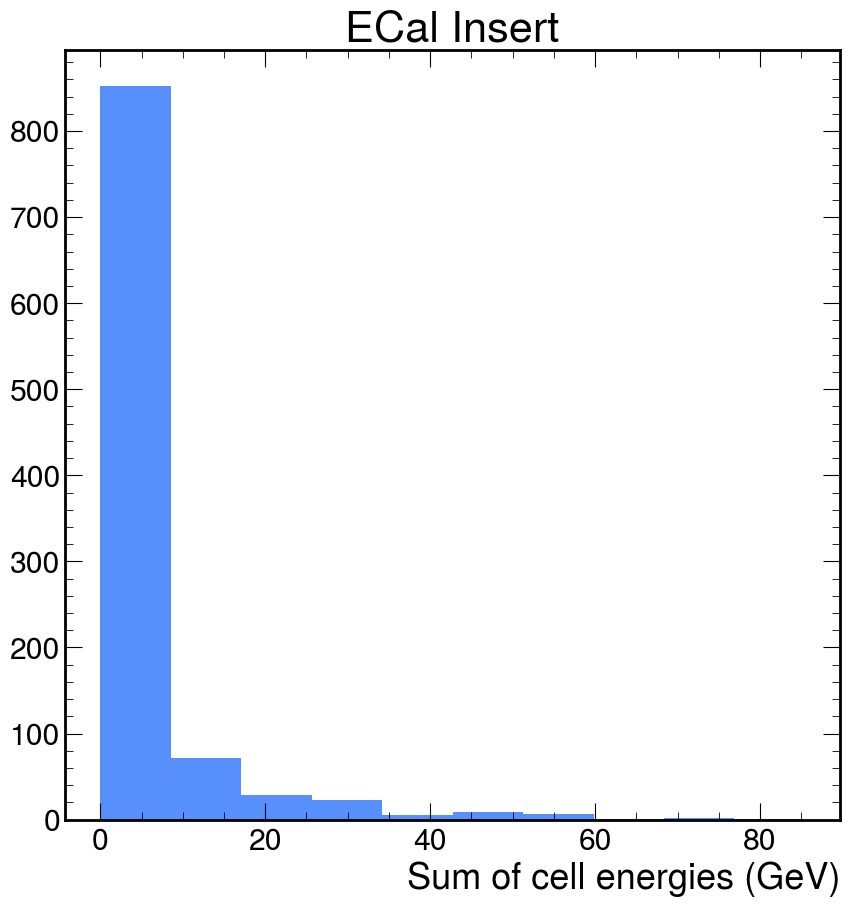

In [5]:
nrows=2
ncols=2
ecal_insert_cell_energies = reco["EcalEndcapPInsertRecHits.energy"]
ecal_insert_cell_times = reco["EcalEndcapPInsertRecHits.time"]
ecal_insert_x_pos = reco["EcalEndcapPInsertRecHits.position.x"]
ecal_insert_y_pos = reco["EcalEndcapPInsertRecHits.position.y"]
ecal_insert_z_pos = reco["EcalEndcapPInsertRecHits.position.z"]
print(ecal_insert_z_pos)
fig2, ax2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
variables=[ecal_insert_cell_energies, ecal_insert_x_pos, ecal_insert_y_pos, ecal_insert_z_pos]
titles=['Hit Energy','X position', 'Y Position', 'Z position']
for index, (variable, title) in enumerate(zip(variables, titles)):
    irow=int(index/nrows)
    icol=index%ncols
    min_range=np.min(ak.flatten(variable))
    max_range=np.max(ak.flatten(variable))
        
    if index==0:
        ax2[irow, icol].set_ylabel("Count", fontsize=20)
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [GeV]", fontsize=30)
        ax2[irow, icol].set_yscale('log')
        nbins=100
    else:    
        nbins=int((max_range-min_range)/10.0) 
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [mm]", fontsize=30)
    if nbins == 0:
        nbins = 100
    ax2[irow, icol].hist(ak.flatten(variable), bins=nbins, histtype='stepfilled', linewidth=3)
    
    ax2[irow, icol].yaxis.set_tick_params(labelsize=30)
    ax2[irow, icol].xaxis.set_tick_params(labelsize=30)
plt.subplots_adjust(wspace=0.3, hspace=0.2)    
plt.suptitle("ECal insert")
plt.tight_layout()
# pdf_pages.savefig(fig2,   bbox_inches='tight')
fig = plt.figure()
plt.hist(ak.sum(ecal_insert_cell_energies, axis=1))
plt.xlabel("Sum of cell energies (GeV)")
plt.title("ECal Insert")

Text(0.5, 1.0, 'ECal')

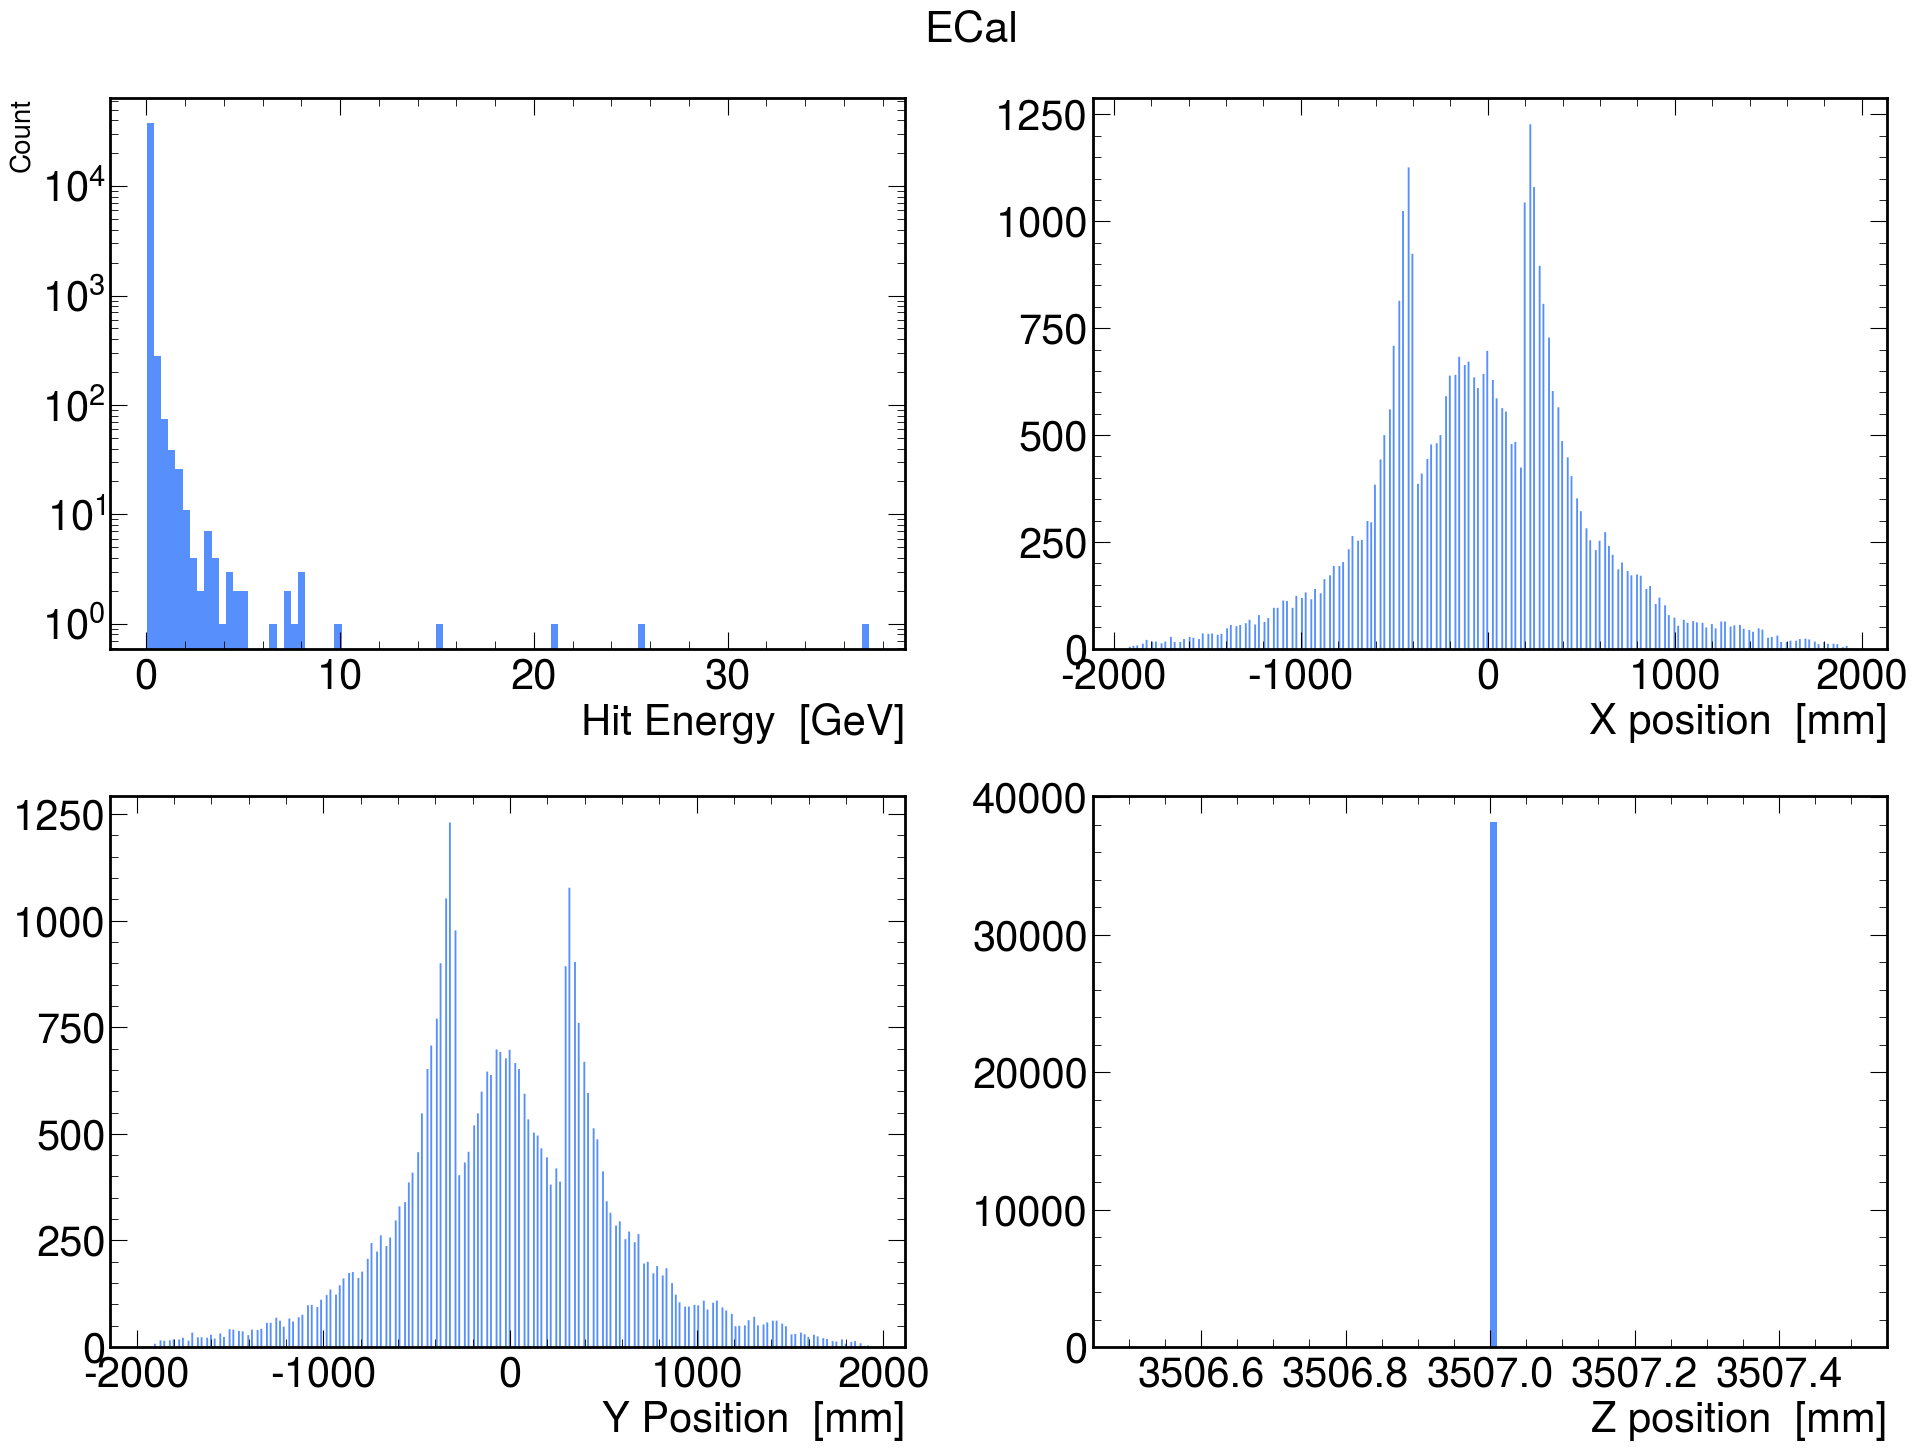

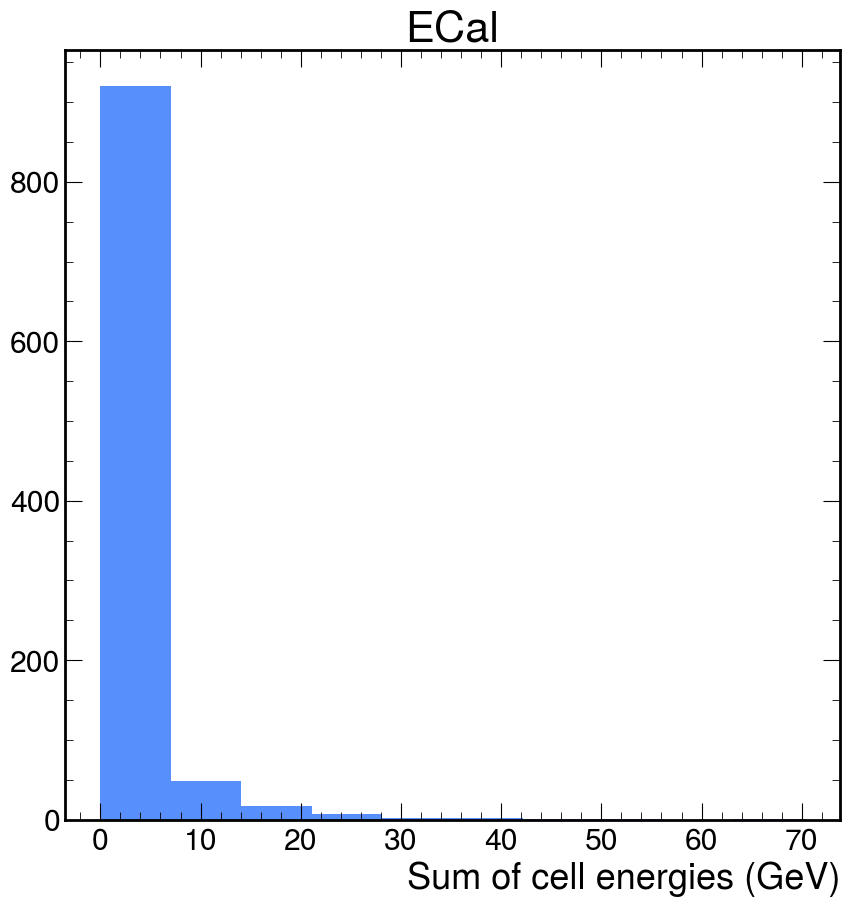

In [6]:
nrows=2
ncols=2
ecal_cell_energies = reco["EcalEndcapPRecHits.energy"]
ecal_cell_times = reco["EcalEndcapPRecHits.time"]
ecal_x_pos = reco["EcalEndcapPRecHits.position.x"]
ecal_y_pos = reco["EcalEndcapPRecHits.position.y"]
ecal_z_pos = reco["EcalEndcapPRecHits.position.z"]

fig2, ax2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
variables=[ecal_cell_energies, ecal_x_pos, ecal_y_pos, ecal_z_pos]
titles=['Hit Energy','X position', 'Y Position', 'Z position']
for index, (variable, title) in enumerate(zip(variables, titles)):
    irow=int(index/nrows)
    icol=index%ncols
    min_range=np.min(ak.flatten(variable))
    max_range=np.max(ak.flatten(variable))
        
    if index==0:
        ax2[irow, icol].set_ylabel("Count", fontsize=20)
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [GeV]", fontsize=30)
        ax2[irow, icol].set_yscale('log')
        nbins=100
    else:    
        nbins=int((max_range-min_range)/10.0) 
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [mm]", fontsize=30)
    if nbins == 0:
        nbins = 100
    ax2[irow, icol].hist(ak.flatten(variable), bins=nbins, histtype='stepfilled', linewidth=3)
    
    ax2[irow, icol].yaxis.set_tick_params(labelsize=30)
    ax2[irow, icol].xaxis.set_tick_params(labelsize=30)
plt.subplots_adjust(wspace=0.3, hspace=0.2)    
plt.suptitle("ECal")
plt.tight_layout()
# pdf_pages.savefig(fig2,   bbox_inches='tight')
fig = plt.figure()
plt.hist(ak.sum(ecal_cell_energies, axis=1))
plt.xlabel("Sum of cell energies (GeV)")
plt.title("ECal")

100
519
519
120


Text(0.5, 1.0, 'HCal')

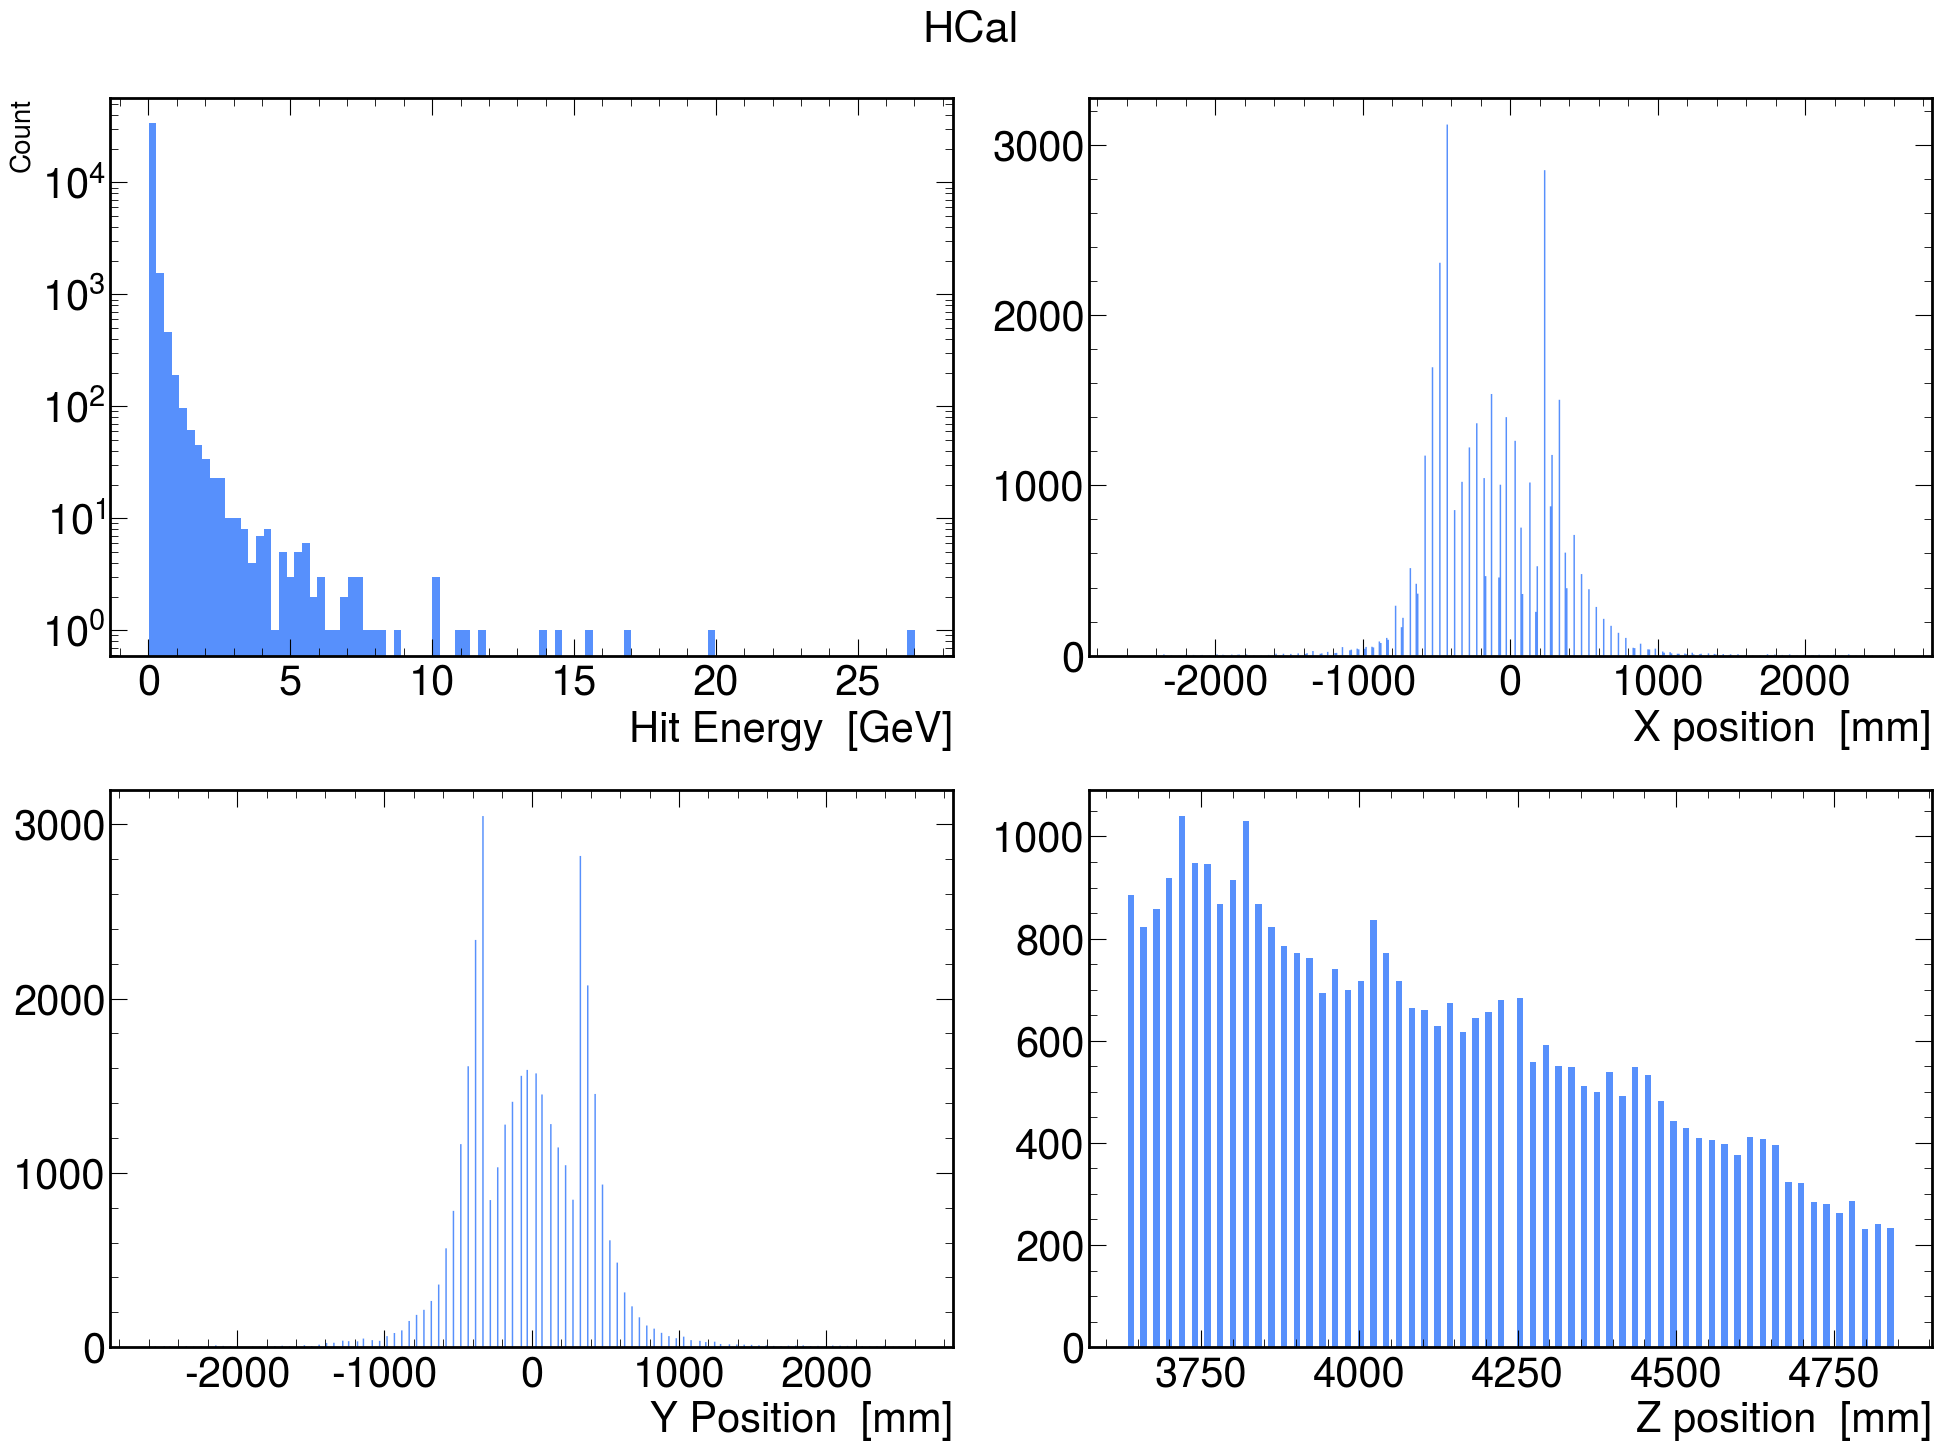

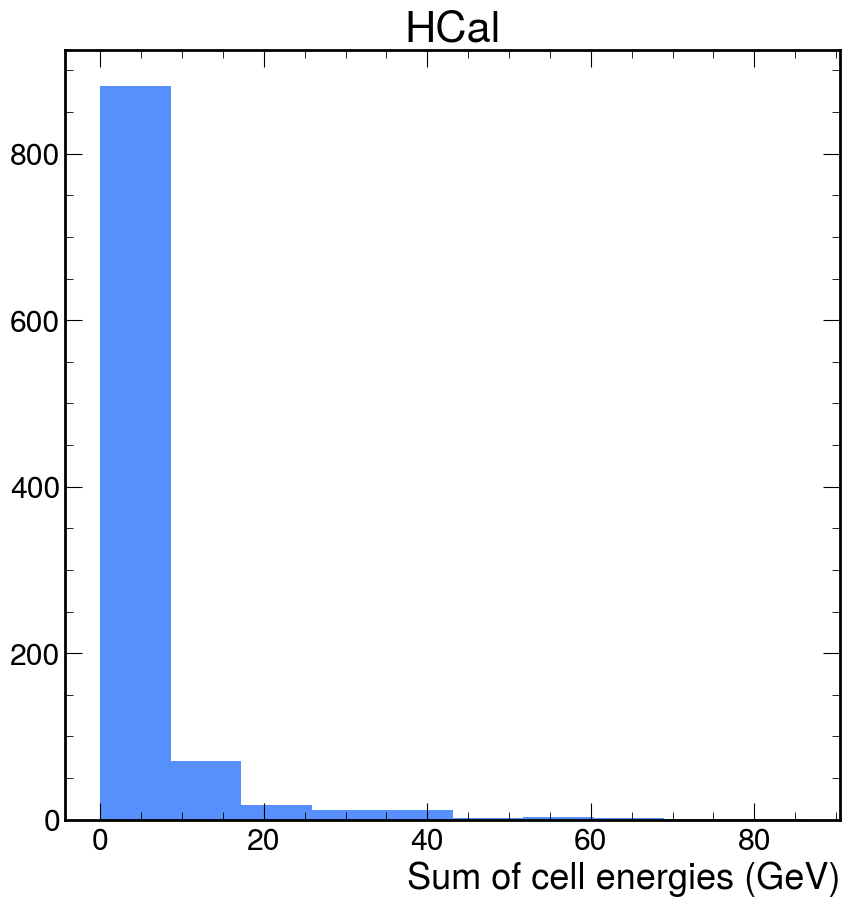

In [7]:
nrows=2
ncols=2
hcal_cell_energies = reco["LFHCALRecHits.energy"]
hcal_cell_times = reco["LFHCALRecHits.time"]
hcal_x_pos = reco["LFHCALRecHits.position.x"]
hcal_y_pos = reco["LFHCALRecHits.position.y"]
hcal_z_pos = reco["LFHCALRecHits.position.z"]

fig2, ax2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
variables=[hcal_cell_energies, hcal_x_pos, hcal_y_pos, hcal_z_pos]
titles=['Hit Energy','X position', 'Y Position', 'Z position']
for index, (variable, title) in enumerate(zip(variables, titles)):
    irow=int(index/nrows)
    icol=index%ncols
    min_range=np.min(ak.flatten(variable))
    max_range=np.max(ak.flatten(variable))
        
    if index==0:
        ax2[irow, icol].set_ylabel("Count", fontsize=20)
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [GeV]", fontsize=30)
        ax2[irow, icol].set_yscale('log')
        nbins=100
    else:    
        nbins=int((max_range-min_range)/10.0) 
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [mm]", fontsize=30)
    print(nbins)
    if nbins == 0:
        nbins = 100
    ax2[irow, icol].hist(ak.flatten(variable), bins=nbins, histtype='stepfilled', linewidth=3)
    
    ax2[irow, icol].yaxis.set_tick_params(labelsize=30)
    ax2[irow, icol].xaxis.set_tick_params(labelsize=30)
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.suptitle("HCal")
plt.tight_layout()
# pdf_pages.savefig(fig2,   bbox_inches='tight')
fig = plt.figure()
plt.hist(ak.sum(hcal_cell_energies, axis=1))
plt.xlabel("Sum of cell energies (GeV)")
plt.title("HCal")

Text(0, 1, 'Reconstructed energy (GeV)')

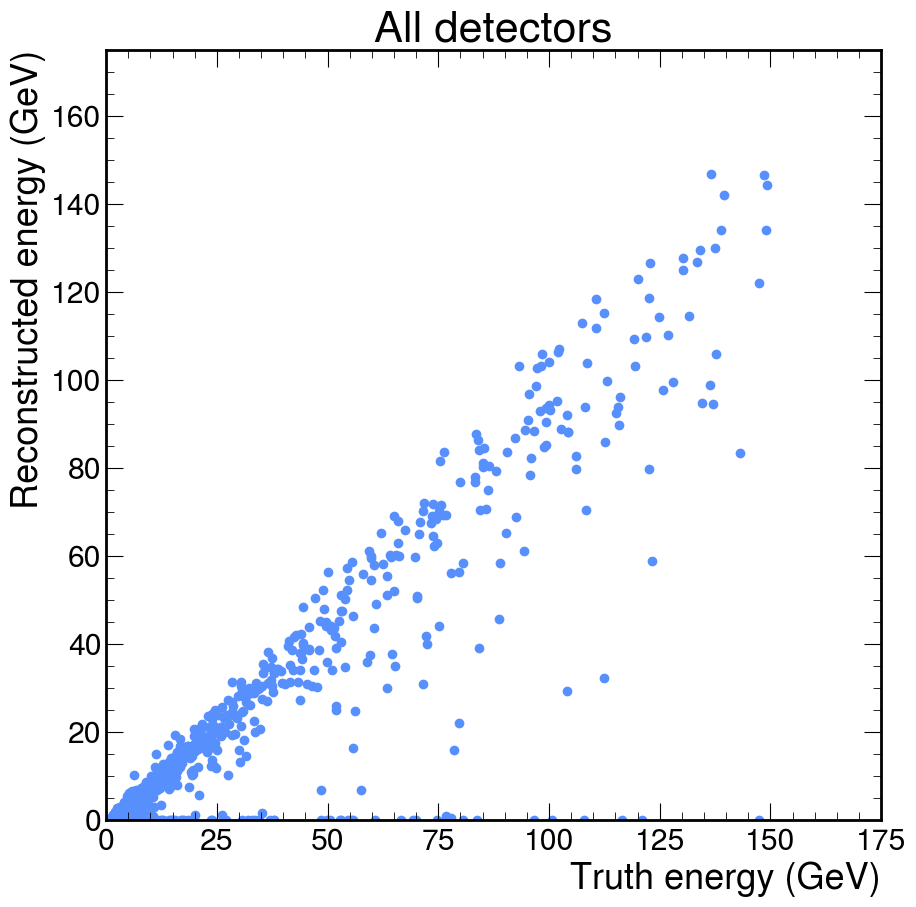

In [8]:
reco_energy = ak.sum(ecal_insert_cell_energies, axis=1)+ak.sum(ecal_cell_energies, axis=1)+ak.sum(insert_cell_energies, axis=1)/.02+ak.sum(hcal_cell_energies, axis=1)
plt.scatter(ak.flatten(energy), reco_energy)
plt.ylim(0,175)
plt.xlim(0,175)
plt.title("All detectors")
plt.xlabel("Truth energy (GeV)")
plt.ylabel("Reconstructed energy (GeV)")